<a href="https://colab.research.google.com/github/MarcelDelhez/Albatross/blob/master/ReturnsDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Historical returns
This workbook aims to give a view on returns from the past and this based on fixed investment horizons (1, 2, 3, 5 and 10 years).
This graphical representation of returns distribution will be based on an index (BEL 20 into this example).

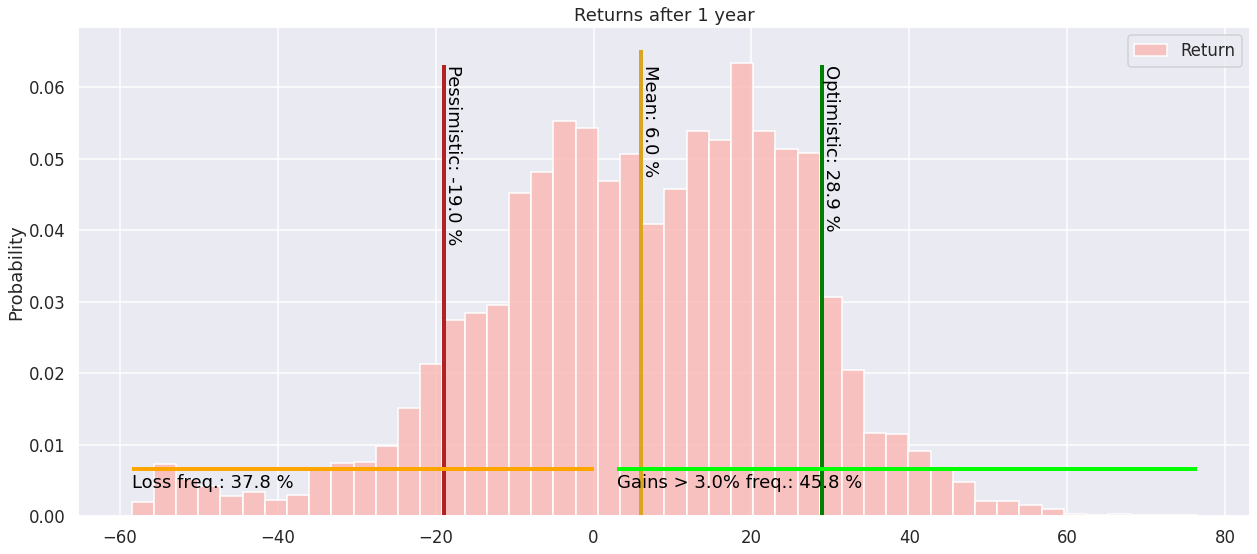

In [9]:
#@title Investment horizon { run: "auto" }
StockIndex = "Bel 20" #@param ["Bel 20", "AEX", "S&P500"]
DecentRate = 3 #@param {type:"slider", min:2, max:5, step:1}
YearsInvestHorizon = 1 #@param {type:"slider", min:1, max:10, step:1}


CurrIdx = ""
if CurrIdx != StockIndex: 
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    import statistics
    from scipy import stats
    import pandas_datareader as web
    import pandas as pd
    import numpy as np
    import datetime
    start_date = datetime.datetime(1970,1,2)
    end_date = datetime.date.today()
    StockIndexes = {"Bel 20": "^BFX", "AEX": "^AEX", "S&P500": "^GSPC"}
    df = web.DataReader(StockIndexes[StockIndex], 'yahoo', start_date, end_date)
    CurrIdx = StockIndex

#%matplotlib inline
#%pylab inline

annees=YearsInvestHorizon
decentreturn=100*((1+DecentRate/100)**annees-1)

ret=(pd.DataFrame(df["Adj Close"].shift(0-(252*annees))/df["Adj Close"]).dropna()-1)*100
ret = ret.rename(columns={"Adj Close": "Return"})
if len(ret) == 0:
    print("**** Sorry, not enought data, select shorter term ****")
else:
    plt.figure(figsize=(21,9))
    sns.set(style='darkgrid', context='talk', palette='Pastel1')
    plt.title("Returns after {} year{}".format(annees, ("s" if (annees>1) else "")))

    sns.histplot(data=ret, stat="probability")
    top = plt.ylim()[1]

    # Plot mean return
    moy=statistics.mean(ret["Return"])
    plt.vlines(x=moy, ymin=0, ymax=0.98*top, color='GoldenRod', linewidth=4)
    plt.text(moy,0.95*top,"Mean: {:.1f} %".format(moy), rotation=-90, color='k', verticalalignment='top')

    # Plot percentiles lines
    pc10=ret["Return"].quantile(.10)
    pc90=ret["Return"].quantile(.90)
    ectyp=statistics.stdev(ret["Return"])
    plt.vlines(x=pc10, ymin=0, ymax=0.95*top, color='FireBrick', linewidth=4)
    plt.text(pc10,0.95*top,"Pessimistic: {:.1f} %".format(pc10),rotation=-90, color='k', verticalalignment='top')
    plt.vlines(x=pc90, ymin=0, ymax=0.95*top, color='Green', linewidth=4)
    plt.text(pc90,0.95*top,"Optimistic: {:.1f} %".format(pc90),rotation=-90, color='k', verticalalignment='top')

    # Plot loss
    if stats.percentileofscore(ret["Return"],0) > 0:
        plt.hlines(y=top*0.1, xmax=0, xmin=min(ret["Return"]), color="orange", linewidth=4)
        plt.text(min(ret["Return"]),top*0.1*0.9,"Loss freq.: {:.1f} %".format(stats.percentileofscore(ret["Return"],0)),rotation=0, color='k', verticalalignment='top')
    #plot gains
    if 100-stats.percentileofscore(ret["Return"],10) > 0:
        plt.hlines(y=top*.1, xmin=decentreturn, xmax=max(ret["Return"]), color="lime", linewidth=4)
        plt.text(decentreturn,top*0.1*0.9,"Gains > {:.1f}% freq.: {:.1f} %".format(decentreturn, 100-stats.percentileofscore(ret["Return"],10)),rotation=0, color='k', verticalalignment='top')
    
    plt.show()